Importamos librerias.

In [40]:
#Para manipulacion de datos.
import pandas as pd
import numpy as np

#Para visualizacion de datos.
import matplotlib as mpl
import seaborn as sns
pd.options.display.max_rows = 30
import matplotlib.pyplot as plt
%matplotlib inline

#Para mostrar estadisticas.
from scipy import stats
from sklearn import metrics
from sklearn import datasets

#Para la regresion logistica y seleccion de features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.cross_validation import train_test_split

Cargamos el dataset.

In [2]:
df = pd.read_csv('adult.csv',skiprows=1,names=['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation', 'relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country','income'])
print(df.shape)
print(df.isna().sum())

(32561, 15)
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


Hacemos revision de datos faltantes

In [3]:
df = df.applymap(lambda x : np.nan if x == "?" else x).dropna() #Decidimos deshacernos de ellos ya que solo se componen por aproximadamente 2000 registros.
df.shape

(30162, 15)

Revisamos columnas

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [5]:
#print(df.age.unique()) #No es necesario convertir

#print(df.workclass.unique()) 
#'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc','Local-gov' 'Without-pay'

#df.education.unique() 
#'HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate','Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-voc','1st-4th', '5th-6th', 'Assoc-acdm', '12th', '9th', 'Preschool'

#df.sort_values("education.num") 
#De 1 - preschool a 16 - Doctorate

#df["marital_status"].unique() #7 val
#'Widowed', 'Divorced', 'Separated', 'Never-married','Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'

#df.occupation.unique() # 14 val
#'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty','Other-service', 'Adm-clerical', 'Transport-moving', 'Sales','Craft-repair', 'Farming-fishing', 'Tech-support','Protective-serv', 'Handlers-cleaners', 'Armed-Forces','Priv-house-serv'

#df.relationship.unique()
#'Not-in-family', 'Unmarried', 'Own-child', 'Other-relative','Husband', 'Wife'

#print(df.race.unique()) # 5 val
#'White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'

#df.sex.unique() # 2 val

#print(df['capital_loss']) #No es necesario convertir

#df.fnlwgt.unique().shape

#sns.distplot(df.fnlwgt)


#df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})


Hacemos cambios en los datos.

In [29]:
df['workclass_num'] = df.workclass.map({'Private':0, 'State-gov':1, 'Federal-gov':2, 'Self-emp-not-inc':3, 'Self-emp-inc':4, 'Local-gov':5, 'Without-pay':6})

df["marital_status_num"] = df["marital_status"].map({'Widowed':0, 'Divorced':1, 'Separated':2, 'Never-married':3,'Married-civ-spouse':4, 'Married-spouse-absent':5, 'Married-AF-spouse':6})

df["occupation_num"] = df["occupation"].map({'Exec-managerial':0, 'Machine-op-inspct':1, 'Prof-specialty':2,'Other-service':3, 'Adm-clerical':4, 'Transport-moving':5, 'Sales':6,'Craft-repair':7, 'Farming-fishing':8, 'Tech-support':9,'Protective-serv':10, 'Handlers-cleaners':11, 'Armed-Forces':12,'Priv-house-serv':13})

df["relationship_num"] = df.relationship.map({'Not-in-family':0, 'Unmarried':1, 'Own-child':2, 'Other-relative':3,'Husband':4, 'Wife':5})

df["race_num"] = df.race.map({'White':0 ,'Black':1, 'Asian-Pac-Islander':2 ,'Other':3, 'Amer-Indian-Eskimo':4})

df["sex_num"] = np.where(df.sex == "Male", 0,1) #dos valores; a una variable dummy 

df["capital_chage"] = df["capital_loss"].apply(lambda x : -x) + df["capital_gain"]

df["american_num"] = np.where(df["native_country"] == "United-States", 1,0) #dos valores para no sobrecomplicar la dummy 0 si es extranjero, 1 si es estadounidense

df["income_num"] = np.where(df.income == '<=50K', 0, 1) #Dos valores; a una variable dummy

numerable = ["age","workclass_num","education_num","marital_status_num","occupation_num","relationship_num","sex_num","capital_loss","capital_gain",'hours_per_week','american_num']
target = ["income_num"]

In [34]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,income,workclass_num,marital_status_num,occupation_num,relationship_num,race_num,sex_num,capital_chage,american_num,income_num
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,<=50K,0,0,0,0,0,1,-4356,1,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,<=50K,0,1,1,1,0,1,-3900,1,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,<=50K,0,2,2,2,0,1,-3900,1,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,...,<=50K,0,1,3,1,0,1,-3770,1,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,...,<=50K,0,2,4,1,0,0,-3770,1,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,...,>50K,1,3,2,3,0,1,-3683,1,1
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,...,<=50K,2,1,2,0,0,1,-3683,1,0
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,...,>50K,0,1,2,1,1,1,-3004,1,1
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,...,>50K,3,3,2,0,0,0,-2824,1,1
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,...,>50K,0,0,3,0,0,1,-2824,1,1


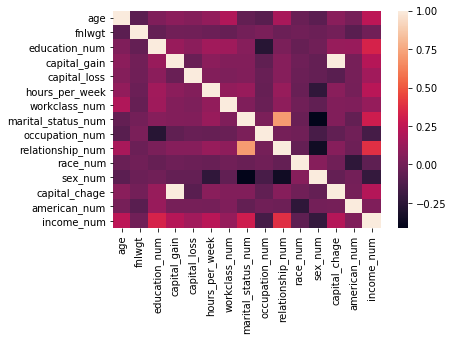

In [7]:
sns.heatmap(df.corr());
#df.corr()["feature"].apply(abs).sort_values(ascending=False)

In [30]:
X = df[numerable]
y = df[target]

In [ ]:
#X = df['workclass_num', 'education.num', 'marital_num', 'race_num', 'sex_num', 'rel_num', 'capital.gain', 'capital.loss']

In [31]:
X.shape

(30162, 11)

In [32]:
# create a base classifier used to evaluate a subset of attributes
logreg = LogisticRegression()

# create the RFE model and select 3 attributes
rfe = RFE(logreg, 4)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
muestra = zip(rfe.support_,rfe.ranking_,X.columns)
#print(rfe.support_)
#print(rfe.ranking_)
#print(X.columns)
for i in muestra:
    print(i)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(False, 4, 'age')
(False, 6, 'workclass_num')
(True, 1, 'education_num')
(False, 3, 'marital_status_num')
(False, 2, 'occupation_num')
(True, 1, 'relationship_num')
(True, 1, 'sex_num')
(False, 7, 'capital_loss')
(False, 8, 'capital_gain')
(False, 5, 'hours_per_week')
(True, 1, 'american_num')


In [ ]:
Chequeamos la feature importances.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


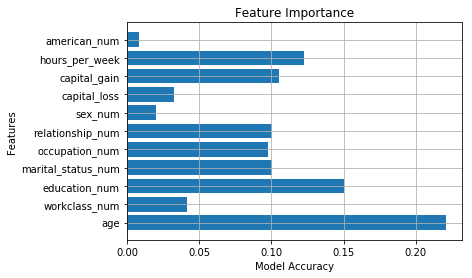

In [35]:
# fittear an Extra Tree model to the data
extree = ExtraTreesClassifier()
extree.fit(X, np.ravel(y))

# display the relative importance of each attribute
relval = extree.feature_importances_

# horizontal bar plot of feature importance
pos = np.arange(11) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, ("age","workclass_num","education_num","marital_status_num","occupation_num","relationship_num","sex_num","capital_loss","capital_gain",'hours_per_week','american_num'))
plt.grid(True)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)
y_train = np.ravel(y_train)

Probamos utilizar regresion logistica.

In [45]:
# Instanciasión.
logreg = LogisticRegression()

# Fiteo.
logreg.fit(X_train, y_train)

# Predicción.
y_pred = logreg.predict(X_test)

print('LogReg %s' % metrics.accuracy_score(y_test, y_pred))

LogReg 0.8387481766343986


In [ ]:
Probamos usar k-vecínos

In [46]:
from sklearn.neighbors import KNeighborsClassifier
k_range = np.arange(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores.index(max(scores)), max(scores))


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was

21 0.8574459620739955


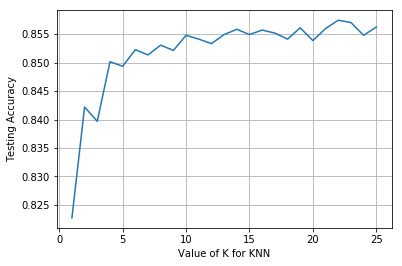

In [47]:
# plot the relationship between K and testing precisión
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.grid(True)